(supervised:ann:training)=
# Training ANNs

In this chapter we have a close look at gradient descent methods and implement a complete ANN algorithm. Then we went on to Scikit-Learn's ANN routines.

## Gradient Descent for Nonlinear Minimization Problems

Consider a function $h:\mathbb{R}^p\rightarrow\mathbb{R}$ and the corresponding minimization problem
\begin{equation*}
h(w_1,\ldots,w_p)\to\min_{w\in\mathbb{R}^p}.
\end{equation*}
The gradient
\begin{equation*}
\nabla h(w_1,\ldots, w_p)=\begin{bmatrix}\frac{\partial}{\partial w_1}h(w_1,\ldots,w_p)\\\vdots\\\frac{\partial}{\partial w_p}h(w_1,\ldots,w_p)\end{bmatrix}
\end{equation*}
is the vector of partial derivatives of $h$ with respect to all variables $w_1,\ldots,w_p$.
The gradient is known to be the direction of steepest ascent. In other words, $-\nabla h(w)$ is the direction of steepest descent of $h$ at $w$.

To find a minimizer of $h$ we might start at some point $w^{(0)}$, substract the gradient $\nabla h(w^{(0)})$ giving a new point $w^{(1)}$, substract $\nabla h(w^{(1)})$, and so on. This way function values should become smaller step by step. The problem is that the negative gradient only provides a direction, but no information about how far we should go in this direction. Thus, we have to introduce a parameters $s_0,s_1,\ldots$ for each step controlling the step length.

For general directions we have the following algorithm:
1. Choose a starting point $w^{(0)}$.
2. Repeat for $i=0,1,\ldots$:
   1. Choose a direction $r_i$.
   2. Choose a step length $s_i$.
   3. Set $w^{(i+1)}=w^{(i)}+s_i\,r_i$
   4. If $|w^{(i+1)}-w^{(i)}|$ is small enough, then stop iteration.

In the simplest case we would choose
\begin{equation*}
r_i=-\nabla h\bigl(w^{(i)}\bigr)\qquad\text{and}\qquad s_i=s
\end{equation*}
with a constant step length $s>0$. With this choice we obtain the *steepest descent method*. It is not guaranteed to converge. Convergence means, that the stopping cirterion is satisfied after sufficiently many steps. Small $s$ yields higher chances for convergence, but many iterations are required. Large $s$ decreases the number of iterations, but the method may not converge.

To improve performance directions different from the negative gradient can be used. There is a long list of sensible directions and step lengths, but details are out of this book's scope.

## Gradient Descent for ANNs

To apply gradient descent for training ANNs we have to compute the gradient of the objective
\begin{equation*}
h(w)=\frac{1}{n}\,\sum_{l=1}^n\bigl(f_{\mathrm{approx}}(x_l)-y_l\bigr)^2
\end{equation*}
with respect to th weight vector $w$ containing all weights of the ANN.

For each component of the gradient $\nabla_w h(w)$ we have
\begin{equation*}
\frac{\partial}{\partial w_\kappa}h(w)
=\frac{1}{n}\,\frac{\partial}{\partial w_\kappa}\sum_{l=1}^n\bigl(f_{\mathrm{approx}}(x_l)-y_l\bigr)^2
=\frac{1}{n}\,\sum_{l=1}^n\frac{\partial}{\partial w_\kappa}\bigl(f_{\mathrm{approx}}(x_l)-y_l\bigr)^2.
\end{equation*}
Chain rule yields
\begin{equation*}
\frac{\partial}{\partial w_\kappa}h(w)
=\frac{1}{n}\,\sum_{l=1}^n2\,\bigl(f_{\mathrm{approx}}(x_l)-y_l\bigr)\,\frac{\partial}{\partial w_\kappa}f_{\mathrm{approx}}(x_l).
\end{equation*}
Thus,
\begin{equation*}
\nabla h(w)
=\frac{2}{n}\,\sum_{l=1}^n\bigl(f_{\mathrm{approx}}(x_l)-y_l\bigr)\,\nabla f_{\mathrm{approx}}(x_l).
\end{equation*}

If we take $\nabla f_{\mathrm{approx}}(x_1),\ldots,\nabla f_{\mathrm{approx}}(x_n)$ as columns of a matrix $G\in\mathbb{R}^{p\times n}$ with $p$ being the total number of weights and if we set
\begin{equation*}
y_{\mathrm{pred}}:=\begin{bmatrix}f_{\mathrm{approx}}(x_1)\\\vdots\\f_{\mathrm{approx}}(x_n)\end{bmatrix}\qquad\text{and}\qquad y=\begin{bmatrix}y_1\\\vdots\\y_n\end{bmatrix},
\end{equation*}
we obtain
\begin{equation*}
\nabla h(w)
=\frac{2}{n}\,G\,(y_{\mathrm{pred}}-y).
\end{equation*}

It remains to find the gradient of $f_{\mathrm{approx}}(x)$ with respect to the weight vector $w$ for some feature vector $x$. This gradient heavily depends on the structure of the ANN.

### Single Layer ANNs

We compute the gradient $\nabla f_{\mathrm{approx}}(x)$ for an ANN with only one layer. The main difficulty is to find manageable notation. We have $m$ features, $q$ regular neurons, two bias neurons and one output neuron. 

```{figure} grad-single-layer.svg
---
alt: Single layer ANN with weight symbols
---
Single layer ANN with mathematical notation for weights.
```

We number the regular neurons by $1,\ldots,q$. Weights of the regular neuron with number $\mu$ are denoted by $w^{\mathrm{in},\mu}_0,w^{\mathrm{in},\mu}_1,\ldots,w^{\mathrm{in},\mu}_m$, where $w^{\mathrm{in},\mu}_0$ is the weight of the bias input and the others are for the $m$ feature inputes.
Weights of the output neuron are denoted by $w^{\mathrm{out}}_0,w^{\mathrm{out}}_1,\ldots,w^{\mathrm{out}}_q$. Again, $w^{\mathrm{out}}_0$ is for the bias input and the others are for the inputs from the $q$ regular neurons.
Activation functions are $g_{\mathrm{in}}$ for all regular neurons and $g_{\mathrm{out}}$ for the output neuron.

With this notation we have
\begin{equation*}
w=\begin{bmatrix}w^{\mathrm{in},1}_0&\cdots&w^{\mathrm{in},1}_m&\cdots&w^{\mathrm{in},q}_0&\cdots&w^{\mathrm{in},q}_m&w^{\mathrm{out}}_0&\cdots&w^{\mathrm{out}}_q\end{bmatrix}^{\mathrm{T}}\in\mathbb{R}^{(m+1)\,q+q+1}
\end{equation*}
for the weight vector and
\begin{equation*}
f_{\mathrm{approx}}(x)=g_{\mathrm{out}}\left(w^{\mathrm{out}}_0+\sum_{\mu=1}^q w^{\mathrm{out}}_\mu\,g_{\mathrm{in}}\left(w^{\mathrm{in},\mu}_0+\sum_{k=1}^m w^{\mathrm{in},\mu}_k\,x^{(k)}\right)\right)
\end{equation*}
for the hypothesis.
Chain rule yields
\begin{equation*}
\frac{\partial}{\partial w^{\mathrm{in},\mu}_0}f_{\mathrm{approx}}(x)
=w^{\mathrm{out}}_\mu\,g_{\mathrm{in}}^\prime\left(w^{\mathrm{in},\mu}_0+\sum_{k=1}^m w^{\mathrm{in},\mu}_k\,x^{(k)}\right)\,g_{\mathrm{out}}^\prime\left(w^{\mathrm{out}}_0+\sum_{\tilde{\mu}=1}^q w^{\mathrm{out}}_{\tilde{\mu}}\,g_{\mathrm{in}}\left(w^{\mathrm{in},\tilde{\mu}}_0+\sum_{k=1}^m w^{\mathrm{in},\tilde{\mu}}_k\,x^{(k)}\right)\right),
\end{equation*}
\begin{equation*}
\frac{\partial}{\partial w^{\mathrm{in},\mu}_k}f_{\mathrm{approx}}(x)
=x^{(k)}\,w^{\mathrm{out}}_\mu\,g_{\mathrm{in}}^\prime\left(w^{\mathrm{in},\mu}_0+\sum_{\tilde{k}=1}^m w^{\mathrm{in},\mu}_{\tilde{k}}\,x^{(\tilde{k})}\right)\,g_{\mathrm{out}}^\prime\left(w^{\mathrm{out}}_0+\sum_{\tilde{\mu}=1}^q w^{\mathrm{out}}_{\tilde{\mu}}\,g_{\mathrm{in}}\left(w^{\mathrm{in},\tilde{\mu}}_0+\sum_{\tilde{k}=1}^m w^{\mathrm{in},\tilde{\mu}}_{\tilde{k}}\,x^{(\tilde{k})}\right)\right)
\end{equation*}
and
\begin{equation*}
\frac{\partial}{\partial w^{\mathrm{out}}_0}f_{\mathrm{approx}}(x)
=g_{\mathrm{out}}^\prime\left(w^{\mathrm{out}}_0+\sum_{\mu=1}^q w^{\mathrm{out}}_\mu\,g_{\mathrm{in}}\left(w^{\mathrm{in},\mu}_0+\sum_{k=1}^m w^{\mathrm{in},\mu}_k\,x^{(k)}\right)\right),
\end{equation*}
\begin{equation*}
\frac{\partial}{\partial w^{\mathrm{out}}_\mu}f_{\mathrm{approx}}(x)
=g_{\mathrm{in}}\left(w^{\mathrm{in},\mu}_0+\sum_{k=1}^m w^{\mathrm{in},\mu}_k\,x^{(k)}\right)\,g_{\mathrm{out}}^\prime\left(w^{\mathrm{out}}_0+\sum_{\tilde{\mu}=1}^q w^{\mathrm{out}}_{\tilde{\mu}}\,g_{\mathrm{in}}\left(w^{\mathrm{in},\tilde{\mu}}_0+\sum_{k=1}^m w^{\mathrm{in},\tilde{\mu}}_k\,x^{(k)}\right)\right).
\end{equation*}
Introducing *activations*
\begin{equation*}
a^{\mathrm{in},\mu}:=w^{\mathrm{in},\mu}_0+\sum_{k=1}^m w^{\mathrm{in},\mu}_k\,x^{(k)}
\end{equation*}
for the regular neurons and
\begin{equation*}
a^{\mathrm{out}}:=w^{\mathrm{out}}_0+\sum_{\mu=1}^q w^{\mathrm{out}}_\mu\,g_{\mathrm{in}}\bigl(a^{\mathrm{in},\mu}\bigr)
\end{equation*}
for the output neuron, we may rewrite those formulas as
\begin{equation*}
\frac{\partial}{\partial w^{\mathrm{in},\mu}_0}f_{\mathrm{approx}}(x)
=w^{\mathrm{out}}_\mu\,g_{\mathrm{in}}^\prime\bigl(a^{\mathrm{in},\mu}\bigr)\,g_{\mathrm{out}}^\prime\bigl(a^{\mathrm{out}}\bigr),
\end{equation*}
\begin{equation*}
\frac{\partial}{\partial w^{\mathrm{in},\mu}_k}f_{\mathrm{approx}}(x)
=x^{(k)}\,w^{\mathrm{out}}_\mu\,g_{\mathrm{in}}^\prime\bigl(a^{\mathrm{in},\mu}\bigr)\,g_{\mathrm{out}}^\prime\bigl(a^{\mathrm{out}}\bigr)
\end{equation*}
and
\begin{equation*}
\frac{\partial}{\partial w^{\mathrm{out}}_0}f_{\mathrm{approx}}(x)
=g_{\mathrm{out}}^\prime\bigl(a^{\mathrm{out}}\bigr),
\end{equation*}
\begin{equation*}
\frac{\partial}{\partial w^{\mathrm{out}}_\mu}f_{\mathrm{approx}}(x)
=g_{\mathrm{in}}\bigl(a^{\mathrm{in},\mu}\bigr)\,g_{\mathrm{out}}^\prime\bigl(a^{\mathrm{out}}\bigr).
\end{equation*}

To get the gradient $\nabla h(w)$ we have to do the following:
1. Calculate all activations for all feature vectors $x_1,\ldots,x_n$.
2. Calculate predictions for all feature vectors $x_1,\ldots,x_n$ (based on activations from step 1).
3. Built the gradient matrix $G$ (based on activations from step 1).
4. Calculate $\nabla h(w)$ from predictions and gradient matrix (see above).

### Multilayer ANNs

We compute the gradient $\nabla f_{\mathrm{approx}}(x)$ for an ANN with $L\geq 2$ layers (excluding the output layer). Above we considered the special case $L=1$. For general $L\in\mathbb{N}$ notation is slightly more difficult.

```{figure} grad-multi-layer.svg
---
alt: Multilayer ANN with weight symbols
---
Multilayer ANN with mathematical notation for weights.
```

We number the layers from 1 (connected to ANN inputs) to $L$ (connected to output neuron). Layer 1 has $q_1$ neurons, layer 2 has $q_2$ neurons, and so on. We set $q_0:=m$ to be the number of features (inputs to layer 1). Weights are denoted by $w^{\lambda,\mu}_\nu$ with $\lambda=1,\ldots,L$ for the layer, $\mu=1,\ldots,q_\lambda$ for the neuron in the layer, $\nu=0,1,\ldots,q_{\lambda-1}$ for the inputs of the neuron (0 for bias neuron plus $q_{\lambda-1}$ regular neurons in previous layer). Weights of the output neuron are $w^{\mathrm{out}}_0,\ldots,w^{\mathrm{out}}_{q_L}$. Activation functions are denoted layerwise by $g_1,\ldots,g_L$ and $g_{\mathrm{out}}$.

We have
\begin{equation*}
w=\begin{bmatrix}w^{1,1}_0&\cdots&w^{1,q_1}_{q_0}&\cdots&w^{L,1}_0&\cdots&w^{L,q_L}_{q_{L-1}}&w^{\mathrm{out}}_0&\cdots&w^{\mathrm{out}}_{q_L}\end{bmatrix}^{\mathrm{T}}\in\mathbb{R}^p
\end{equation*}
with
\begin{equation*}
p=1+q_L+\sum_{\lambda=1}^L q_\lambda\,(1+q_{\lambda-1})
\end{equation*}
for the weight vector.

For each neuron corresponding activations are defined as follows:
\begin{equation*}
a^{1,\mu}:=w^{1,\mu}_0+\sum_{\nu=1}^{q_0}w^{1,\mu}_\nu\,x^{(\nu)}\qquad\text{for}\qquad \mu=1,\ldots,q_1,
\end{equation*}
\begin{equation*}
a^{\lambda,\mu}:=w^{\lambda,\mu}_0+\sum_{\nu=1}^{q_{\lambda-1}}w^{\lambda,\mu}_\nu\,g_{\lambda-1}\bigl(a^{\lambda-1,\nu}\bigr)\qquad\text{for}\qquad \mu=1,\ldots,q_\lambda\qquad\text{and}\qquad\lambda=2,\ldots,L,
\end{equation*}
\begin{equation*}
a^{\mathrm{out}}:=w^{\mathrm{out}}_0+\sum_{\nu=1}^{q_L}w^{\mathrm{out}}_\nu\,g_L\bigl(a^{L,\nu}\bigr).
\end{equation*}

With this notation the hypothesis is
\begin{equation*}
f_{\mathrm{approx}}(x)=g_{\mathrm{out}}\bigl(a^{\mathrm{out}}\bigr).
\end{equation*}

Partial derivatives with respect to the weights of the output neuron are
\begin{equation*}
\frac{\partial}{\partial w^{\mathrm{out}}_0}f_{\mathrm{approx}}(x)
=g_{\mathrm{out}}^\prime\bigl(a^{\mathrm{out}}\bigr)\,\frac{\partial}{\partial w^{\mathrm{out}}_0}a^{\mathrm{out}}
=g_{\mathrm{out}}^\prime\bigl(a^{\mathrm{out}}\bigr),
\end{equation*}
\begin{equation*}
\frac{\partial}{\partial w^{\mathrm{out}}_\nu}f_{\mathrm{approx}}(x)
=g_{\mathrm{out}}^\prime\bigl(a^{\mathrm{out}}\bigr)\,\frac{\partial}{\partial w^{\mathrm{out}}_\nu}a^{\mathrm{out}}
=g_{\mathrm{out}}^\prime\bigl(a^{\mathrm{out}}\bigr)\,g_L\bigl(a^{L,\nu}\bigr)
\qquad\text{for}\qquad\nu=1,\ldots,q_L.
\end{equation*}
For the other neurons we have
\begin{equation*}
\frac{\partial}{\partial w^{\lambda,\mu}_\nu}f_{\mathrm{approx}}(x)
=g_{\mathrm{out}}^\prime\bigl(a^{\mathrm{out}}\bigr)\,\frac{\partial}{\partial w^{\lambda,\mu}_\nu}a^{\mathrm{out}}
=g_{\mathrm{out}}^\prime\bigl(a^{\mathrm{out}}\bigr)\,\left(\sum_{\tilde{\nu}=1}^{q_L}w^{\mathrm{out}}_{\tilde{\nu}}\,g_L^\prime\bigl(a^{L,\tilde{\nu}}\bigr)\,\frac{\partial}{\partial w^{\lambda,\mu}_\nu}a^{L,\tilde{\nu}}\right)
\qquad\text{for}\qquad\nu=0,1,\ldots,q_{\lambda-1}.
\end{equation*}
We see that we need the partial derivatives of the activations at layer $L$. These will depend on the derivatives of the activations at previous layers. Thus, we calculate all partial derivatives of all activations. Consider a weight $w^{\lambda,\mu}_\nu$. This weight has no influence on activations at layers above layer $\lambda$ and it also has no influence on activations of neurons at layer $\lambda$ other than neuron $\mu$. So corresponding derivatives are zero. For activations $a^{\lambda,\mu}$ (neuron the weight belongs to) we get an explicit formula. For layers below layer $\lambda$ we obtain recursive formulas:
\begin{align*}
\frac{\partial}{\partial w^{\lambda,\mu}_\nu}a^{\tilde{\lambda},\tilde{\mu}}
&=\frac{\partial}{\partial w^{\lambda,\mu}_\nu}\left(w^{\tilde{\lambda},\tilde{\mu}}_0+\sum_{\tilde{\nu}=1}^{q_{\tilde{\lambda}-1}}w^{\tilde{\lambda},\tilde{\mu}}_{\tilde{\nu}}\,g_{\tilde{\lambda}-1}\bigl(a^{\tilde{\lambda}-1,\tilde{\nu}}\bigr)\right)\\
&=\begin{cases}
0,&\text{if }\tilde{\lambda}<\lambda,\\
0,&\text{if }\tilde{\lambda}=\lambda,\,\tilde{\mu}\neq\mu,\\
1,&\text{if }\tilde{\lambda}=\lambda,\,\tilde{\mu}=\mu,\,\nu=0,\\
g_{\lambda-1}\bigl(a^{\lambda-1,\nu}\bigr),&\text{if }\tilde{\lambda}=\lambda,\,\tilde{\mu}=\mu,\,\nu>0,\\
\sum\limits_{\tilde{\nu}=1}^{q_{\tilde{\lambda}-1}}w^{\tilde{\lambda},\tilde{\mu}}_{\tilde{\nu}}\,g_{\tilde{\lambda}-1}^\prime\bigl(a^{\tilde{\lambda}-1,\tilde{\nu}}\bigr)\,\frac{\partial}{\partial w^{\lambda,\mu}_\nu}a^{\tilde{\lambda}-1,\tilde{\nu}},&\text{if }\tilde{\lambda}>\lambda.
\end{cases}
\end{align*}
To get partial derivatives for activations on layer $L$ with respect to a weight at layer $\lambda$ we first have to calculate all derivatives for activations at layer $\lambda$, then at layer $\lambda+1$ and so on until we reach layer $L$. Partial derivatives at layer $L$ then yield the desired partial derivative of the ANN's output.

### Weight Initialization

For the gradient descent algorithm we need to choose a starting guess. That is we have to choose initial values for all weights. We could set all weights to zero, but then all neurons in a layer would get identical input, leading to identical partial derivatives in the gradient. Thus, each layer would behave like only one single neuron. To brake this symmetry one chooses small random numbers as inital weights. All neurons will have different contributions to the ANN's output and gradient descent will favor some neurons and some neurons will become less influencial.

We have to keep in mind that gradient descent is likely to converge to a local minimum or, even worse, a stationary point close to the starting point. Thus, different sets of initial weights may yield different training results.

### Input Standardization

Training data should be standardized to equalize numeric ranges of different features. If there would be a feature with much higher values than the others, then this feature would have much more influence on the initial activations of the neurons. Thus, corresponding weights will have large components in the gradient and will undergo heavy manipulation whereas the other weights change only slightly in each gradient descent step.

### Stochastic and Mini-batch Training

In each step of the gradient descent method we need to access the whole data set. Each column of the gradient matrix $G$ corresponds to one sample. For large data sets this approach consumes too many resources. If the data set does not fit into memory, then we cannot use the algorithm.

A much more efficient approach is to use only one sample per step. Then the gradient matrix $G$ has only one column and we save lots of resources. For each gradient descent step we randomly choose a different sample. Thus, all samples will have influence on the training result as before. This approach is known as *stochastic gradient descent*. Another advantage is that if the training data set grows during training, then we can integrate newly arrived data directly into the training process. This is known as *online learning*.

*Mini-batch gradient descent* is a mixture of both approaches. We split the training data set into a number of disjoint subsets and use a different subset in each gradient descent step. Compared to the full data approach we save resources, but each sample has more influence on the result than for stochastic gradient descent. If the mini-batches are chosen randomly, then this method sometimes is refered to as *stochastic gradient descent*, too.

### How to Choose Step Length?

If the step length is small, then there is a good chance to find a minimizer of the objective function, but convergence will be slow. If the step length is large, then we will be relatively close to a minimizer after few descent steps, but the iterates will overshoot the minimizer. Thus, there will be no convergence.

There exist several strategies to choose the step length. In principle, step length for training is a hyperparameter of an ANN. We could try different step lengths and look at the prediction quality of the resulting ANN. Another strategy is to start with large step length and to decrease it during iteration. The idea is to get close to a minimizer within few iterations. Then the minimizer is approached slowly to avoid overshooting. There exist several other proposals for *step length schedules* and there are mathematically justified step length selection rules, too.

### Momentum Methods

Steepest descent is only one variant of gradient descent methods. Steepest descent is the simplest and straight forward, but suffers from slow convergence and from getting trapped at saddle points. An imporvement is to add *momentum*. Here, momentum is to be understood in the sense of physics: a ball rolling down a curvy hill does not follow the direction of steepest descent, but, due to its momentum, overshoots curves slightly and will cross small dents without problems. Thus, it will not get trapped by flat local minima or saddle points.

From the mathematical point of view adding momentum means that the step direction not only depends on the current gradient, but also on previous gradients. Usually only the gradient at the previous iterate is used in addition. There are different concrete realizations of the momentum idea out there.

## Implementation from Scratch

Later on we will use specialized Python modules for defining and training ANNs. But to gain greater insight into ANNs we implement the code for a multi-layered feedforward net from scratch.

We first define a class for representing ANNs and then we write a script implementing the steepest descent method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

rng = np.random.default_rng(0)

In [2]:
class LayeredFeedforwardANN:
    
    def __init__(self, inputs, neurons, act_funcs):
        '''
        inputs    ... number of inputs (features) to the ANN
        neurons   ... neurons per layer (list with one item per layer, without output layer)
        act_funcs ... activation functions (list with one item per layer, including output layer),
                      an activation function has to take two arguments:
                      - 2d NumPy array with activations,
                      - True/False, False for function evaluation, True for derivative,
                      has to return NumPy array of same shape as first argument
        '''
        
        # number of layers (excluding output layer) --> L
        self.layers = len(neurons)
        
        # number of neurons per layer (layer 0 contains feature values, bias neurons excluded)
        # in formulas above: q_0, ..., q_L, 1
        self.neurons = np.array([inputs] + neurons + [1])
        
        # activation function for each layer (layer 0 has no activation function)
        # in formulas above: -, g_1, ..., g_L, g_out
        self.act_funcs = [None] + act_funcs
                
        # number of weights per layer
        self.weights = np.empty(self.layers + 2, dtype=np.int32)
        self.weights[0] = 0    # feature values (layer 0)
        self.weights[1:] = self.neurons[1:] * (1 + self.neurons[:-1])

        # weight vector
        self.weight_vector = np.zeros(np.sum(self.weights))
        
        # activations (one matrix per layer, one row per sample,
        # columns correspond to neurons, column 0 is bias neurons with nan as activation
        # to have first regular neuron at column 1)
        self.activations = [None]    # no neurons with activations on layer 0
        for layer in range(1, self.layers + 2):
            self.activations.append(np.zeros((1, 1 + self.neurons[layer])))
            self.activations[layer][0] = np.nan
            
        # outputs (one matrix per layer, one row per sample,
        # columns correspond to neurons, column 0 is bias neuron)
        self.outputs = []
        for layer in range(0, self.layers + 2):
            self.outputs.append(np.zeros((1, 1 + self.neurons[layer])))
    
    def update(self, X):
        ''' calculate activations and outputs for all neurons (rows of X are feature vectors) '''

        # outputs of layer 0 are feature values
        self.outputs[0] = np.hstack((np.ones((X.shape[0], 1)), X))
        
        for layer in range(1, self.layers + 2):
            
            # weight matrix for layer
            W = self.weight_vector[np.sum(self.weights[0:layer]):np.sum(self.weights[0:(layer+1)])]
            W = W.reshape(self.neurons[layer], 1 + self.neurons[layer - 1])
            
            # activation of neurons in layer
            self.activations[layer] = np.empty((X.shape[0], 1 + self.neurons[layer]))
            self.activations[layer][:, 0] = np.nan    # bias neuron has no activation
            self.activations[layer][:, 1:] = np.matmul(W, self.outputs[layer - 1].T).T
            
            # outputs of neurons in layer
            self.outputs[layer] = np.empty((X.shape[0], 1 + self.neurons[layer]))
            self.outputs[layer][:, 0] = 1
            self.outputs[layer][:, 1:] = self.act_funcs[layer](self.activations[layer][:, 1:])
    
    def predict(self, X):
        ''' rows of X are feature vectors '''
        
        self.update(X)
        
        return self.outputs[-1][:, -1]    # exclude output of bias neuron in output layer
    
    def _flat(self, l, n, i):
        ''' calculate index for self.weight_vector from layer, neuron, input indices
        (in formulas above: l --> \lambda, n --> \mu, i --> \nu) '''
        
        return np.sum(self.weights[0:l]) + (n - 1) * (1 + self.neurons[l - 1]) + i
        # (n - 1) because bias neuron has no weights
    
    def get_gradient(self, X=None):
        ''' If X is None, then gradient with X from previous call to self.predict
        is returned. Else self.predict(X) is called before calculating the gradient.
        Return value is matrix with one column per sample (column is gradient).
        '''
        
        # update activations and outputs, if necessary
        if not (X is None):
            self.update(X)
        
        # derivatives of activation functions at current activations
        derivatives = [None]
        for layer in range(1, self.layers + 2):
            derivatives.append(np.empty(self.activations[layer].shape))
            derivatives[layer][:, 0] = np.nan
            derivatives[layer][:, 1:] = self.act_funcs[layer](self.activations[layer][:, 1:],
                                                              derivative=True)
            
        # partial derivatives of all activations w.r.t. all weights
        # (one 3d-array per layer: dim. 0 is weight, dim. 1 is sample, dim. 2 is neuron)
        # Python names versus variables in formulas above:
        # layer --> \tilde{\lambda} ... layer of activation
        # neuron --> \tilde{\mu}    ... neuron of activation
        # l --> \lambda             ... layer neuron weight belongs to
        # n --> \mu                 ... neuron weight belongs to
        # i --> \nu                 ... neuron input comes from
        pd_of_acts = [None]    # no activations on layer 0 (feature values)
        for layer in range(1, self.layers + 2):
            pd_of_acts.append(np.zeros((self.weight_vector.size, *self.activations[layer].shape)))
            
            for neuron in range(1, self.neurons[layer] + 1):

                # l < layer
                for l in range(1, layer):
                    for n in range(1, self.neurons[l] + 1):
                        for i in range(0, self.neurons[l - 1] + 1):
                            pd_of_acts[layer][self._flat(l, n, i), :, neuron] \
                                = np.sum(self.weight_vector[self._flat(layer, neuron, 1):(self._flat(layer, neuron, self.neurons[layer-1])+1)]
                                         * derivatives[layer - 1][:, 1:]
                                         * pd_of_acts[layer - 1][self._flat(l, n, i), :, 1:], axis=1)
            
                # l == layer (only p.d. for n == neuron are nonzero)
                pd_of_acts[layer][self._flat(layer, neuron, 0), :, neuron] = 1
                for i in range(1, self.neurons[layer - 1] + 1):
                    pd_of_acts[layer][self._flat(layer, neuron, i), :, neuron] \
                        = self.outputs[layer - 1][:, i]

        # make gradient
        G = np.empty((self.weight_vector.size, self.outputs[-1].shape[0]))
        for l in range(1, self.layers + 2):
            for n in range(1, self.neurons[l] + 1):
                for i in range(0, self.neurons[l - 1] + 1):
                    G[self._flat(l, n, i), :] = (derivatives[-1][:, 1:]
                                                * pd_of_acts[-1][self._flat(l, n, i), :, 1:]).reshape(-1)

        return G

We need some activation functions. Linear activation is used for the output neuron. The others are for the hidden neurons.

In [3]:
def linear_activation(a, derivative=False):
    
    if derivative:
        return np.ones(a.shape)
    else:
        return a

    
def relu_activation(a, derivative=False):
    
    if derivative:
        return (a > 0).astype(a.dtype)
    else:
        return np.maximum(np.zeros(a.shape), a)
    

def tanh_activation(a, derivative=False):
    
    if derivative:
        return 1 - np.tanh(a) ** 2
    else:
        return np.tanh(a)

To test our ANN code we simulate some data with two features. We only use two features for testing, because a function on $\mathbb{R}^2$ can be visualized as 3d plot.

In [4]:
def truth(x1, x2):
    return np.sin(np.pi * x1) + x2 ** 2

n_grid = 50    # grid point per axis for plotting

x1 = np.linspace(-1, 1, n_grid)
x2 = np.linspace(-1, 1, n_grid)
[grid_x1, grid_x2] = np.meshgrid(x1, x2)
grid_truth = truth(grid_x1, grid_x2)

fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

fig.add_trace(go.Surface(
    x=grid_x1, y=grid_x2, z=grid_truth,
    colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']],
    showscale=False
))

fig.update_scenes(
    xaxis_title_text='feature 1',  
    yaxis_title_text='feature 2',  
    zaxis_title_text='target'
)
fig.update_layout(title={'text': 'truth', 'x': 0.5, 'xanchor': 'center'})

fig.show()

From the true function (which is unknown in practise) we draw samples for training the ANN. To come closer to real data we add some random noise.

In [5]:
n_samples = 100
noise_level = 0.05

X = rng.uniform(-1, 1, (n_samples, 2))
y = truth(X[:, 0], X[:, 1]) + rng.normal(0, noise_level, n_samples)

fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

fig.add_trace(go.Surface(
    x=grid_x1, y=grid_x2, z=grid_truth,
    colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']],
    showscale=False
))

fig.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=y,
    marker={'size': 2, 'color': 'rgba(255,0,0,1)'},
    line={'width': 0, 'color': 'rgba(0,0,0,0)'},
    hoverinfo = 'none'
))

fig.update_scenes(
    xaxis_title_text='feature 1',  
    yaxis_title_text='feature 2',  
    zaxis_title_text='target'
)
fig.update_layout(title={'text': 'truth and noisy data', 'x': 0.5, 'xanchor': 'center'})

fig.show()

We implement gradient descent using all training samples in each gradient step.

In [6]:
def gradient_descent_full_batch(net, X, y):
    
    step_length = 0.1
    max_iter = 10000    # stop after at most so many iterations
    smallest_grad = 1e-10    # abort iteration if gradient size is below this value
    show_status_after = 100    # print infos after so many interations
    
    for i in range(0, max_iter):
        
        y_pred = net.predict(X)
        G = net.get_gradient()
        grad = 2 / y.size * np.matmul(G, (y_pred - y))        

        net.weight_vector = net.weight_vector - step_length * grad
        
        grad_size = np.max(np.abs(grad))
        if grad_size < smallest_grad:
            print('Stopped by small gradient after {} iterations.'.format(i))
            break
        
        if i % show_status_after == 0:
            objective = 1 / y.size * np.sum((y - y_pred) ** 2)
            print('iteration {}, grad size {}, objective value {}'.format(i, grad_size, objective))

    else:
        print('Stopped by max_iter with grad_size = {}.'.format(grad_size))

Now we define an ANN and start training.

In [7]:
net = LayeredFeedforwardANN(2, [5, 4, 3], 3 * [tanh_activation] + [linear_activation])
#net = LayeredFeedforwardANN(2, [5], 1 * [relu_activation] + [linear_activation])

net.weight_vector = 0.1 * rng.normal(size=net.weight_vector.size)
gradient_descent_full_batch(net, X, y)

iteration 0, grad size 0.5199772941237953, objective value 0.6682282913363523
iteration 100, grad size 0.004188259115251231, objective value 0.6001853239675975
iteration 200, grad size 0.0067462327164474, objective value 0.5994163438040679
iteration 300, grad size 0.01947130728030662, objective value 0.5945976349492498
iteration 400, grad size 0.05696353674497658, objective value 0.27437575660531127
iteration 500, grad size 0.027526464130790823, objective value 0.21478552687825506
iteration 600, grad size 0.009114642672881857, objective value 0.19661760598408443
iteration 700, grad size 0.004846327193297142, objective value 0.193206235258564
iteration 800, grad size 0.004872007975520194, objective value 0.19187781786194577
iteration 900, grad size 0.007417776383947535, objective value 0.19043590964259213
iteration 1000, grad size 0.008885552556249987, objective value 0.18837353720412067
iteration 1100, grad size 0.009568037192828935, objective value 0.18563996550698536
iteration 1200, 

Now the net is trained and we may use it for predicting the target variable for arbitrary data.

In [8]:
X_grid = np.stack((grid_x1.reshape(-1), grid_x2.reshape(-1)), axis=1)
grid_pred = net.predict(X_grid).reshape(n_grid, n_grid)

fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

fig.add_trace(go.Surface(
    x=grid_x1, y=grid_x2, z=grid_truth,
    colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']],
    showscale=False
))

fig.add_trace(go.Scatter3d(
    x=grid_x1.reshape(-1), y=grid_x2.reshape(-1), z=grid_pred.reshape(-1),
    marker={'size': 1, 'color': 'rgba(0,255,0,1)'},
    line={'width': 0, 'color': 'rgba(0,0,0,0)'},
    hoverinfo='none',
    name='predictions'
))

fig.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=y,
    marker={'size': 2, 'color': 'rgba(255,0,0,1)'},
    line={'width': 0, 'color': 'rgba(0,0,0,0)'},
    hoverinfo = 'none',
    name='training data'
))

fig.update_scenes(
    xaxis_title_text='feature 1',  
    yaxis_title_text='feature 2',  
    zaxis_title_text='target'
)
fig.update_layout(title={'text': 'truth vs. predictions', 'x': 0.5, 'xanchor': 'center'})

fig.show()

## ANNs with Scikit-Learn

Scikit-Learn supports layered feedworward ANNs, too. Sometimes, for instance in Scikit-Learn, they are called multi-layer perceptrons or MLPs for short. Corresponding class is [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) in `sklearn.neural_network`. Scikit-Learn's implementation is more efficient than ours above, but not intended for training large scale ANNs. For small and medium sized ANNs it's okay.

Usage is identical to other Scikit-Learn regressors: create an object of type `MLPRegressor`, call `fit`, and then `predict`. Different training algorithms are offered including gradient descent with full batch and mini-batches as well as online learning. For other algorithms have a look at the documentation. Regularization is included, too.

In [9]:
# X, y from above

import sklearn.neural_network as neural_network

reg = neural_network.MLPRegressor(hidden_layer_sizes=(5, 4, 3),
                                  activation='relu',
                                  solver='sgd',    # gradient descent
                                  alpha=0,    # no regularization
                                  batch_size=y.size,    # full batch
                                  learning_rate_init=0.1,
                                  max_iter=10000,
                                  momentum=0,    # no momentum
                                  tol=1e-10,    # stop if change of loss is below
                                  verbose=False)    # print status information
                                  
reg.fit(X, y)

MLPRegressor(alpha=0, batch_size=100, hidden_layer_sizes=(5, 4, 3),
             learning_rate_init=0.1, max_iter=10000, momentum=0, solver='sgd',
             tol=1e-10)

Now the net is trained and we may use it for prediction.

In [10]:
# grid_x1, grid_x2, grid_truth from above

X_grid = np.stack((grid_x1.reshape(-1), grid_x2.reshape(-1)), axis=1)
grid_pred = reg.predict(X_grid).reshape(n_grid, n_grid)

fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

fig.add_trace(go.Surface(
    x=grid_x1, y=grid_x2, z=grid_truth,
    colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']],
    showscale=False
))

fig.add_trace(go.Scatter3d(
    x=grid_x1.reshape(-1), y=grid_x2.reshape(-1), z=grid_pred.reshape(-1),
    marker={'size': 1, 'color': 'rgba(0,255,0,1)'},
    line={'width': 0, 'color': 'rgba(0,0,0,0)'},
    hoverinfo='none',
    name='predictions'
))

fig.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=y,
    marker={'size': 2, 'color': 'rgba(255,0,0,1)'},
    line={'width': 0, 'color': 'rgba(0,0,0,0)'},
    hoverinfo = 'none',
    name='training data'
))

fig.update_scenes(
    xaxis_title_text='feature 1',  
    yaxis_title_text='feature 2',  
    zaxis_title_text='target'
)
fig.update_layout(title={'text': 'truth vs. predictions', 'x': 0.5, 'xanchor': 'center'})

fig.show()

Scikit-Learn provides access to several parameters of the ANN and of the training phase. For example, we may inspect the loss curve, that is, the loss (value of objective function) for each iteration. See documentation for more.

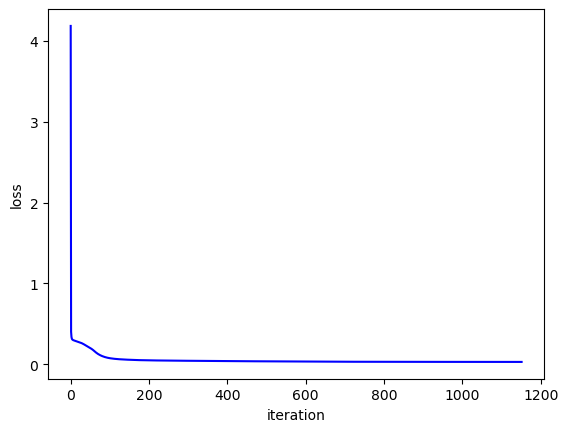

In [11]:
fig, ax = plt.subplots()
ax.plot(reg.loss_curve_, '-b')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.show()